# Practice Project: Insurance Cost Analysis

Related to Linear Regression and Ridge analysis.\
IBM Data Science course-7, module-6.

Practice Lab. 

**Objectives**\
In this project, you will:

1. Load the data as a pandas dataframe
2. Clean the data, taking care of the blank entries
3. Run exploratory data analysis (EDA) and identify the attributes that most affect the charges
4. Develop single variable and multi variable Linear Regression models for predicting the charges
5. Use Ridge regression to refine the performance of Linear regression models.

In [4]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns

## Task - 1: Import the data set 

In [6]:
file_path = r"C:\Users\88017\Documents\mysql_dbs\new_jupyter\csv_files\medical_insurance_dataset.csv"

In [8]:
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df = pd.read_csv(file_path)
df

,19,1,27.9,0,1.1,3,16884.924
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160
...,...,...,...,...,...,...,...
2766,47,1,45.320,1,0,4,8569.86180
2767,21,1,34.600,0,0,3,2020.17700
2768,19,2,26.030,1,1,1,16450.89470
2769,23,2,18.715,0,0,1,21595.38229


In [10]:
df.columns=headers
df

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160
...,...,...,...,...,...,...,...
2766,47,1,45.320,1,0,4,8569.86180
2767,21,1,34.600,0,0,3,2020.17700
2768,19,2,26.030,1,1,1,16450.89470
2769,23,2,18.715,0,0,1,21595.38229


In [14]:
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160


In [16]:
df.isnull().sum()

age               0
gender            0
bmi               0
no_of_children    0
smoker            0
region            0
charges           0
dtype: int64

In [18]:
df.isna().sum()

age               0
gender            0
bmi               0
no_of_children    0
smoker            0
region            0
charges           0
dtype: int64

In [20]:
df.replace('?', np.nan, inplace = True)
df

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,NaN,4,3756.62160
...,...,...,...,...,...,...,...
2766,47,1,45.320,1,0,4,8569.86180
2767,21,1,34.600,0,0,3,2020.17700
2768,19,2,26.030,1,1,1,16450.89470
2769,23,2,18.715,0,0,1,21595.38229


In [22]:
df.isna().value_counts()

age    gender  bmi    no_of_children  smoker  region  charges
False  False   False  False           False   False   False      2760
                                      True    False   False         7
True   False   False  False           False   False   False         4
Name: count, dtype: int64

## Task-2: Data Wrangling

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2767 non-null   object 
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2764 non-null   object 
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [27]:
is_smoker = df['smoker'].value_counts().idxmax() # replace with most frequent value
df["smoker"].replace(np.nan, is_smoker, inplace=True) 


C:\Users\88017\AppData\Local\Temp\ipykernel_9832\489912714.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["smoker"].replace(np.nan, is_smoker, inplace=True)


In [29]:
mean_age = df['age'].astype('float').mean()
df['age'].replace(np.nan, mean_age, inplace=True)
print(mean_age) 

39.11709432598482


C:\Users\88017\AppData\Local\Temp\ipykernel_9832\3372276625.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].replace(np.nan, mean_age, inplace=True)


In [31]:
# update the data type of smoker and age columns 
df[['age','smoker']] = df[['age','smoker']].astype('int')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2771 non-null   int32  
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2771 non-null   int32  
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 130.0 KB


In [35]:
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,0,4,3756.62160


In [37]:
# make round the value of the column name "charges"
df[['charges']] = np.round(df[['charges']],2)
df

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55
1,28,2,33.000,3,0,4,4449.46
2,33,2,22.705,0,0,1,21984.47
3,32,2,28.880,0,0,1,3866.86
4,31,1,25.740,0,0,4,3756.62
...,...,...,...,...,...,...,...
2766,47,1,45.320,1,0,4,8569.86
2767,21,1,34.600,0,0,3,2020.18
2768,19,2,26.030,1,1,1,16450.89
2769,23,2,18.715,0,0,1,21595.38


## Task 3 : Exploratory Data Analysis (EDA)

Implement the regression plot for charges with respect to bmi.

In [40]:
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55
1,28,2,33.000,3,0,4,4449.46
2,33,2,22.705,0,0,1,21984.47
3,32,2,28.880,0,0,1,3866.86
4,31,1,25.740,0,0,4,3756.62


In [42]:
reg = LinearRegression()

In [44]:
xx = df['bmi'] 
yy = df['charges']

(0.0, 66902.85800000001)

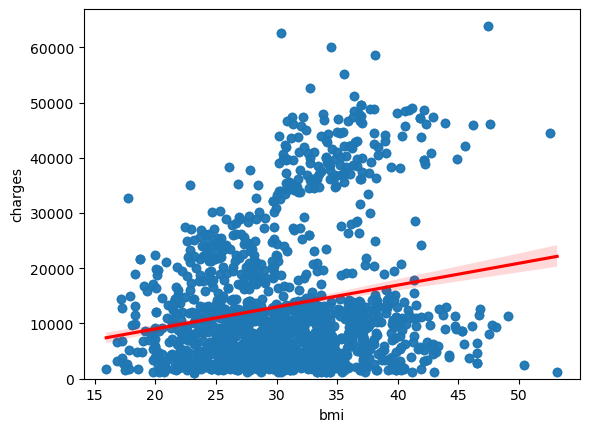

In [46]:
sns.regplot(x ='bmi',y='charges',data = df, line_kws={"color": "red"})
plt.ylim(0,)

<Axes: xlabel='charges', ylabel='smoker'>

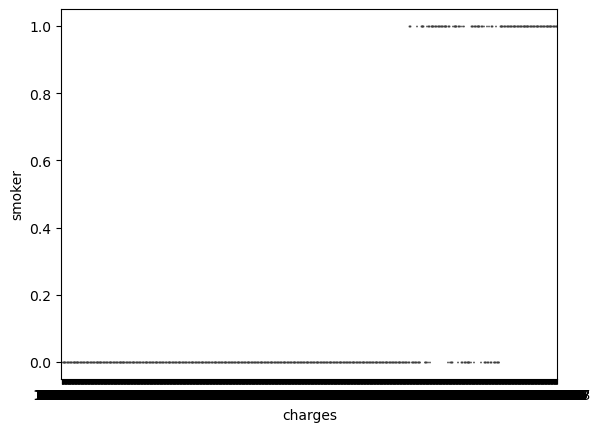

In [51]:
sns.boxplot(x='charges', y='smoker', data=df)


In [52]:
df.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026584,0.112859,0.037126,-0.022290,-0.006969,0.298892
gender,-0.026584,1.000000,0.042766,0.015693,0.083125,0.022360,0.062959
bmi,0.112859,0.042766,1.000000,-0.001642,0.011824,0.271200,0.199906
no_of_children,0.037126,0.015693,-0.001642,1.000000,0.007016,-0.025594,0.066551
smoker,-0.022290,0.083125,0.011824,0.007016,1.000000,0.053839,0.789141
region,-0.006969,0.022360,0.271200,-0.025594,0.053839,1.000000,0.054018
charges,0.298892,0.062959,0.199906,0.066551,0.789141,0.054018,1.000000


## Task -4 : Model Development

**Fit a linear regression model that may be used to predict the charges value, just by using the smoker attribute of the dataset.**

**Print the score of this model.**

In [59]:
x = df[['smoker']]

y = df['charges']

In [61]:
lm = LinearRegression()

In [63]:
lm.fit(x,y)

LinearRegression()

In [65]:
lm.predict(x)

array([ 8417.87439312,  8417.87439312,  8417.87439312, ...,
       32250.3835524 ,  8417.87439312,  8417.87439312])

In [67]:
lm.score(x,y)

0.6227430402464125

In [71]:
# definition of Y and lm remain same as used in last cell. 
z = df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
lm.fit(z,y)
print(lm.score(z, y))

0.7505888664568174


In [73]:
df

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55
1,28,2,33.000,3,0,4,4449.46
2,33,2,22.705,0,0,1,21984.47
3,32,2,28.880,0,0,1,3866.86
4,31,1,25.740,0,0,4,3756.62
...,...,...,...,...,...,...,...
2766,47,1,45.320,1,0,4,8569.86
2767,21,1,34.600,0,0,3,2020.18
2768,19,2,26.030,1,1,1,16450.89
2769,23,2,18.715,0,0,1,21595.38


In [75]:
from sklearn.model_selection import train_test_split

In [80]:
x_train, x_test, y_train, y_test = train_test_split(z, y, test_size=0.2, random_state=1)